In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

! mkdir ./data/images
! mkdir ./data/text.csv
! mv $path/Images/* ./data/images/
! mv $path/captions.txt ./data/text.csv

print("Path to dataset files:", path)

mkdir: cannot create directory ‘./data/text.csv’: File exists
mv: cannot stat '/root/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/captions.txt': No such file or directory
Path to dataset files: /root/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


Important note: The images and texts are not ordered the same 

In [43]:
img_num = 6
image_path = os.listdir("./data/images")[img_num]
print(image_path)
# Currently the image path is a string, to visualize the image we need to convert it to a PIL image

image = Image.open(os.path.join("./data/images/",image_path))

# print(image.dtype)
print(image.size)

# plt.imshow(image)

1009434119_febe49276a.jpg
(500, 333)


uint8
(333, 500, 3)


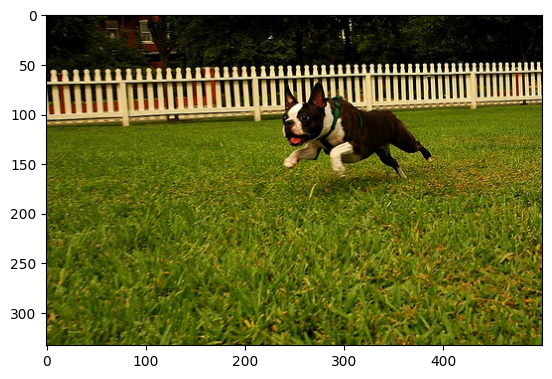

In [52]:
image_array = np.array(image)
print(image_array.dtype)
print(image_array.shape)
plt.imshow(image_array)


In [63]:
def get_captions_for_image(image_filename):
    captions_df = pd.read_csv("./data/text.csv")
    
    image_captions = captions_df[captions_df['image'] == image_filename]
    
    # Return all captions for this image
    return image_captions['caption'].tolist()

# Example usage
image_path = "1009434119_febe49276a.jpg"  # This is just an example, replace with your image path
# Alternatively, you could use: image_path = os.listdir("./data/images")[img_num]

# Get all captions for this image
captions = get_captions_for_image(image_path)

# Print all captions
print(f"Found {len(captions)} captions for image {image_path}:")

for i, caption in enumerate(captions, 1):
    print(f"Caption {i}: {caption}") 

Found 5 captions for image 1009434119_febe49276a.jpg:
Caption 1: A black and white dog is running in a grassy garden surrounded by a white fence .
Caption 2: A black and white dog is running through the grass .
Caption 3: A Boston terrier is running in the grass .
Caption 4: A Boston Terrier is running on lush green grass in front of a white fence .
Caption 5: A dog runs on the green grass near a wooden fence .
